K_means_clustering with kernelization on circles data, with laplace kernel

In [ ]:
from IPython.display import clear_output #for clear output to have dynamic images
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
""" _______________________________________________KERNEL CHOICE AND KERNEL IMPLEMENTATIONS__________________________________________________"""

#kernel name
kernel_name='Laplace Kernel' # 'Gaussian Kernel', 'Sigmoid Kernel' ; 'Polynomial Kernel', 'No Kernel'

#Parameters for kernels

#Parameters for gaussian kernel or Laplacian kernel
Sigma=1

#Parameters for Sigmoid kernel
K_sig=1.
delta_sig=0.

#Parameters for Polynomial Kernel
c_pol=1.
h_pol=3.

def kernel(x,y): 
  """
  Compute and return the corresponding kernel giving the name
  entries : vectors x and y
  output : scalar kernel
  """
  if kernel_name=='Gaussian Kernel':
    return Gaussian_Kernel(x,y)
  elif kernel_name=='Sigmoid Kernel':
    return Sigmoid_Kernel(x,y)
  elif kernel_name=='Polynomial Kernel':
    return Polynomial_Kernel(x,y)
  elif kernel_name=='Laplace Kernel':
    return Laplace_Kernel(x,y)
  elif kernel_name=='No Kernel':
    return no_kernel(x,y)
  else :
    print("Error, we didn't recognise the kernel name")
  
def no_kernel(x,y): #euclidean, should be the same without kernels
  return np.dot(x,y)

def Gaussian_Kernel(x,y):
  return np.exp(-np.inner(x-y,x-y)/(2*Sigma**2)) 
  
def Sigmoid_Kernel(x,y):
  return np.tanh(K_sig*(np.dot(x,y))-delta_sig)

def Polynomial_Kernel(x,y):
  return (np.dot(x,y)+c_pol)**h_pol

def Laplace_Kernel(x,y):
  return np.exp(-np.linalg.norm(x-y)/(Sigma)) 

"""
Others kernels such as 
Fischl
Rational Quadratic Kernel
ANOVA Kernel
Multiquadric Kernel
Inverse Multiquadric Kernel
Circular Kernel
Spherical Kernel
Wave Kernel
Power Kernel
Log Kernel
Spline Kernel
B-Spline (Radial Basis Function) Kernel
Bessel Kernel
Cauchy Kernel
Chi-Square Kernel
Histogram Intersection Kernel
Generalized Histogram Intersection
Generalized T-Student Kernel
Bayesian Kernel
Wavelet Kernel
cf : http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#laplacian 
"""

'\nOthers kernels such as Fischl\nkernel smoother : cf gaussian // Radial basis function kernel \n'

In [ ]:
""" _______________________________________________PRINT CLUSTER VISUALLY__________________________________________________"""
print_at_iteration = True
def print_clusters(K,clusters,X):
  clear_output()
  cols=['k','r','y','g','b','c','m','k','w']
  plt.figure()
  for l in range(K):
      for point in clusters[l]:
          plt.scatter(X[point, 0],X[point, 1],  c=cols[l])
  plt.show()

In [ ]:
""" _______________________________________________NEW LOSS FUNCTION WITH KERNEL____WE DO NOT NEED NOR USE IT______________________________________________"""
def loss_with_kernel(centroids, clusters,X,K): #we compute the new loss with formula (1) from clustering lecture slides
  loss=0
  for k in range(K): 
    for i in clusters[k]: 
      loss+=kernel(X[i],X[i])-2*kernel(X[i],centroid[k])+kernel(centroid[k],centroid[k]) 
  return loss



In [ ]:
import copy #for making deep copy when updating the clusters
""" _______________________________________________NEW MAIN K-CLUSTERING FUNCTION WITH KERNEL__________________________________________________"""
def K_means_clustering_kernel(X,K=10):
  print("K means clustering on your data using " + kernel_name)
  #Initialize clusters , we do not compute here the centroids directly
  N=len(X)
  indexes=[i for i in range(N)]
  clusters=[indexes[i::K] for i in range(K)] #we create the clusters by making a K-split on all indexes
  new_clusters=asign_new_clusters(clusters,X,K)
  
  #Normally we would use the loss function, but we cannot compute the loss directly since we do not have phi, nor we compute the centroids directly, but in fact since it is always getting better at each iteration, we just have to loop until clusters aren't changing anymore => no more improvement
  compteur=0
  while not convergence_clusters(new_clusters,clusters,K): 
    if print_at_iteration:
      print_clusters(K,clusters,X)
    compteur +=1
    clusters=copy.deepcopy(new_clusters) #deep copy because using list of list
    new_clusters=asign_new_clusters(clusters,X,K)
  print("Iteration number : " + str(compteur))
  return clusters

def asign_new_clusters(clusters, X,K): 
  """
  we asign each x_j to cluster 
  k = argmin_l {  K(xj,xj) - 2*sum(K(xj,xi)) + sum(K(xi,xk))  }

  """
  new_clusters=[[] for i in range(K)]
  for i in range(len(X)): #for each xi
    new_clusters[argmin_l(X[i],X,clusters,K)].append(i)
  return new_clusters

delta=0.001 #so if a cluster is empty, we won't divide by zero
def argmin_l(xj,X,clusters,K):
  pseudo_loss=[]
  for l in range(K):
    dist_from_ker=sum([kernel(xj,X[i]) for i in clusters[l]])
    dist_in_ker=sum([kernel(X[i],X[k]) for i in clusters[l] for k in clusters[l]])
    pseudo_loss.append( 
        kernel(xj,xj) - 2*dist_from_ker/(len(clusters[l])+delta) + dist_in_ker/(len(clusters[l])**2+delta)
    )
  return np.argmin(pseudo_loss)

def convergence_clusters(new_clusters,clusters,K): #we basically see if all clusters are the same
  flag=True 
  for l in range(K):
    if new_clusters[l]!=clusters[l]: #if at least one clusters is still changing (so in fact 2)
      flag=False
  return flag


In [ ]:
""" _______________________________________________ACCURACY OF THE CLUSTERING__________________________________________________"""
#Compute the accuracy of the clustering
def accuracy(cluster,y,k):
  acc=0
  card=0
  
  for l in range(k):
    #find the mk
    mk= most_freq_digit(y[cluster[l]],k)
    print('The '+str(l)+'th cluster corresponds to the number '+str(mk))
    for element in y[cluster[l]]:
      if int(element) == mk :
        acc+=1
      card +=1
  return acc/card

  return mk
  
def most_freq_digit(liste,k):
  compteur=[0]*k
  for element in liste:
    element=int(element)
    compteur[element] += 1
  max_elem=max(compteur) 
  index=compteur.index(max_elem)
  return index


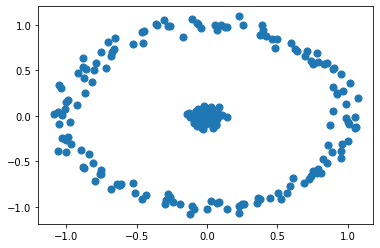

In [ ]:
from sklearn.datasets import make_circles
X, y_true = make_circles(n_samples=300, factor=0.01, noise=0.05, random_state=0)
K=2

plt.scatter(X[:,0],X[:,1],s=50) #print the original data set


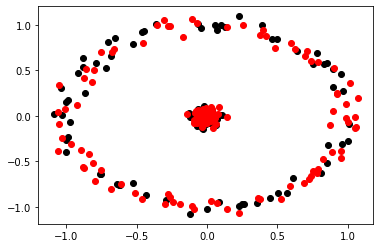

Iteration number : 1


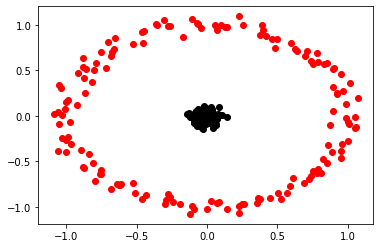

The 0th cluster corresponds to the number 1
The 1th cluster corresponds to the number 0
Using the k-mean clustering with Laplace Kernel on our dataset we were able to get an accuracy of 1.0


In [ ]:
kernel_name='Laplace Kernel' # 'Gaussian Kernel', 'Sigmoid Kernel' ; 'Polynomial Kernel', 'No Kernel', 'Laplace Kernel'
#Parameters for gaussian kernel and laplacian kernel
Sigma=1
clusters=K_means_clustering_kernel(X,K)

cols=['k','r']
print_at_iteration = True
plt.figure()
for l in range(K):
    for point in clusters[l]:
        plt.scatter(X[point, 0],X[point, 1],  c=cols[l])
plt.show()

#print the accuracy
print("Using the k-mean clustering with "+ kernel_name+ " on our dataset we were able to get an accuracy of " + str(accuracy(clusters,y_true,K)))